Mittelwert: 15.153846153846153 Fehler: 0.9811027394435562


A1 = 233.53876260419935 , Standardfehler = 18.475793305724807
l1 = 0.03145132655932665 , Standardfehler = 0.004271569332528803
A2 = 52.317501425611994 , Standardfehler = 9.42879647288569
l2 = 0.0025467620982775083 , Standardfehler = 0.0006731407344075488


Chi-Quadrat = 43.9970552499636
Freiheitsgrade = 37
Chi-Quadrat reduziert = 1.1891096013503677
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 20.0 %


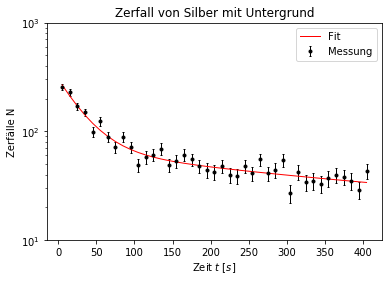

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messdaten laden
unterg =np.loadtxt('data/V252/252_1.dat', usecols=[1])

mittelw_unterg=np.mean(4*unterg)
fehler_unterg=np.std(4*unterg)/np.sqrt(len(unterg))

n1 = np.loadtxt('data/V252/252_2a.dat', usecols=[1])
n2 = np.loadtxt('data/V252/252_2b.dat', usecols=[1])
n3 = np.loadtxt('data/V252/252_2c.dat', usecols=[1])
n4 = np.loadtxt('data/V252/252_2d.dat', usecols=[1])
N = n1+n2+n3[0:-2]+n4
fehler_N = np.sqrt(N)

t = np.arange(5,415,10)

y0=mittelw_unterg #Untergrund
def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

from scipy.optimize import curve_fit

popt, pcov=curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001],
sigma=fehler_N)

chi2_=np.sum((fit_func(t,*popt)-N)**2/fehler_N**2)
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof

from scipy.stats import chi2

prob=round(1-chi2.cdf(chi2_,dof),2)*100
      
#Plot
plt.errorbar(t,N,fehler_N, lw=1, ecolor='k', fmt='.k', capsize=1,label='Messung')
plt.xlabel('Zeit '+r'${t}$'+' '+r'${[s]}$')
plt.ylabel('Zerfälle N')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')
plt.ylim((1e1,1e3))
plt.plot(t, fit_func(t,*popt), 'r', lw=1, label='Fit')
plt.legend(loc='best')

#Output
plt.savefig('figures/252_Diagramm1.pdf', format='pdf')

print('Mittelwert:', mittelw_unterg, 'Fehler:',fehler_unterg)
print('\n')
print('A1 =',popt[0], ', Standardfehler =', np.sqrt(pcov[0][0]))
print('l1 =',popt[1], ', Standardfehler =', np.sqrt(pcov[1][1]))
print('A2 =',popt[2], ', Standardfehler =', np.sqrt(pcov[2][2]))
print('l2 =',popt[3], ', Standardfehler =', np.sqrt(pcov[3][3]))
print('\n')
print('Chi-Quadrat =', chi2_)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =',chi2_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

Mittelwert: 15.153846153846153 Fehler: 0.9811027394435562


A1 = 233.77898317999302 , Standardfehler = 18.43221672786775
l1 = 0.03138645263676077 , Standardfehler = 0.00423028351091981
A2 = 52.968940309992455 , Standardfehler = 9.245839656847474
l2 = 0.0024546572676547016 , Standardfehler = 0.0006491361928334125


Chi-Quadrat = 44.00220880305634
Freiheitsgrade = 37
Chi-Quadrat reduziert = 1.1892488865690902
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 20.0 %


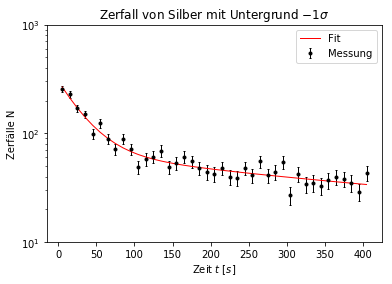

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messdaten laden
unterg =np.loadtxt('data/V252/252_1.dat', usecols=[1])

mittelw_unterg=np.mean(4*unterg)
fehler_unterg=np.std(4*unterg)/np.sqrt(len(unterg))

n1 = np.loadtxt('data/V252/252_2a.dat', usecols=[1])
n2 = np.loadtxt('data/V252/252_2b.dat', usecols=[1])
n3 = np.loadtxt('data/V252/252_2c.dat', usecols=[1])
n4 = np.loadtxt('data/V252/252_2d.dat', usecols=[1])
N = n1+n2+n3[0:-2]+n4
fehler_N = np.sqrt(N)

t = np.arange(5,415,10)

y0=mittelw_unterg-fehler_unterg#Untergrund
def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

from scipy.optimize import curve_fit

popt, pcov=curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001],
sigma=fehler_N)

chi2_=np.sum((fit_func(t,*popt)-N)**2/fehler_N**2)
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof

from scipy.stats import chi2

prob=round(1-chi2.cdf(chi2_,dof),2)*100
      
#Plot
plt.errorbar(t,N,fehler_N, lw=1, ecolor='k', fmt='.k', capsize=1,label='Messung')
plt.xlabel('Zeit '+r'${t}$'+' '+r'${[s]}$')
plt.ylabel('Zerfälle N')
plt.title('Zerfall von Silber mit Untergrund '+r'${-1{\sigma}}$')
plt.yscale('log')
plt.ylim((1e1,1e3))
plt.plot(t, fit_func(t,*popt), 'r', lw=1, label='Fit')
plt.legend(loc='best')

#Output
plt.savefig('figures/252_Diagramm2.pdf', format='pdf')

print('Mittelwert:', mittelw_unterg, 'Fehler:',fehler_unterg)
print('\n')
print('A1 =',popt[0], ', Standardfehler =', np.sqrt(pcov[0][0]))
print('l1 =',popt[1], ', Standardfehler =', np.sqrt(pcov[1][1]))
print('A2 =',popt[2], ', Standardfehler =', np.sqrt(pcov[2][2]))
print('l2 =',popt[3], ', Standardfehler =', np.sqrt(pcov[3][3]))
print('\n')
print('Chi-Quadrat =', chi2_)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =',chi2_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

Mittelwert: 15.153846153846153 Fehler: 0.9811027394435562


A1 = 233.27542565178 , Standardfehler = 18.524636801988333
l1 = 0.03152133200094553 , Standardfehler = 0.004316698621717752
A2 = 51.69489452630725 , Standardfehler = 9.629538437186671
l2 = 0.002645884230071016 , Standardfehler = 0.000699029468838505


Chi-Quadrat = 43.9920866485315
Freiheitsgrade = 37
Chi-Quadrat reduziert = 1.1889753148251756
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 20.0 %


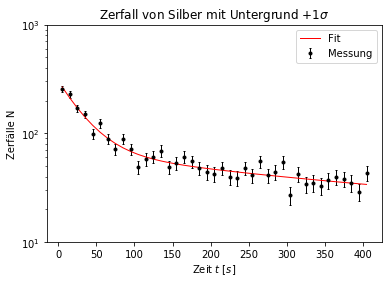

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messdaten laden
unterg =np.loadtxt('data/V252/252_1.dat', usecols=[1])

mittelw_unterg=np.mean(4*unterg)
fehler_unterg=np.std(4*unterg)/np.sqrt(len(unterg))

n1 = np.loadtxt('data/V252/252_2a.dat', usecols=[1])
n2 = np.loadtxt('data/V252/252_2b.dat', usecols=[1])
n3 = np.loadtxt('data/V252/252_2c.dat', usecols=[1])
n4 = np.loadtxt('data/V252/252_2d.dat', usecols=[1])
N = n1+n2+n3[0:-2]+n4
fehler_N = np.sqrt(N)

t = np.arange(5,415,10)

y0=mittelw_unterg+fehler_unterg#Untergrund
def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

from scipy.optimize import curve_fit

popt, pcov=curve_fit(fit_func,t,N, p0=[500,0.02,50,0.001],
sigma=fehler_N)

chi2_=np.sum((fit_func(t,*popt)-N)**2/fehler_N**2)
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof

from scipy.stats import chi2

prob=round(1-chi2.cdf(chi2_,dof),2)*100
      
#Plot
plt.errorbar(t,N,fehler_N, lw=1, ecolor='k', fmt='.k', capsize=1,label='Messung')
plt.xlabel('Zeit '+r'${t}$'+' '+r'${[s]}$')
plt.ylabel('Zerfälle N')
plt.title('Zerfall von Silber mit Untergrund '+r'${+1{\sigma}}$')
plt.yscale('log')
plt.ylim((1e1,1e3))
plt.plot(t, fit_func(t,*popt), 'r', lw=1, label='Fit')
plt.legend(loc='best')

#Output
plt.savefig('figures/252_Diagramm3.pdf', format='pdf')

print('Mittelwert:', mittelw_unterg, 'Fehler:',fehler_unterg)
print('\n')
print('A1 =',popt[0], ', Standardfehler =', np.sqrt(pcov[0][0]))
print('l1 =',popt[1], ', Standardfehler =', np.sqrt(pcov[1][1]))
print('A2 =',popt[2], ', Standardfehler =', np.sqrt(pcov[2][2]))
print('l2 =',popt[3], ', Standardfehler =', np.sqrt(pcov[3][3]))
print('\n')
print('Chi-Quadrat =', chi2_)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =',chi2_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

Mittelwert: 45.46153846153846 Fehler: 2.9433082183306687


A = 731.2548789636279 , Standardfehler = 10.542398662327537
l = 0.0002021452539000327 , Standardfehler = 8.75623691627335e-06


Chi-Quadrat = 18.99523288419279
Freiheitsgrade = 24
Chi-Quadrat reduziert = 0.7914680368413664
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 75.0 %


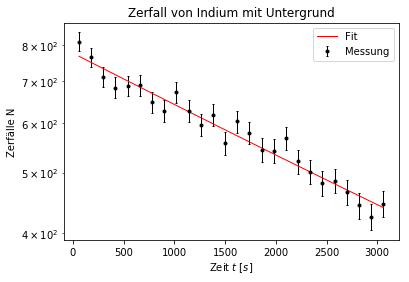

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Messdaten laden
unterg =np.loadtxt('data/V252/252_1.dat', usecols=[1])

mittelw_unterg=np.mean(12*unterg)
fehler_unterg=np.std(12*unterg)/np.sqrt(len(unterg))

N = np.loadtxt('data/V252/252_3.dat', usecols=[1])
fehler_N = np.sqrt(N)

t = np.arange(60,3180,120)

y0=mittelw_unterg #Untergrund
def fit_func(x, A,l):
    return A*np.exp(-x*l) + y0

from scipy.optimize import curve_fit

popt, pcov=curve_fit(fit_func,t,N, p0=[500,0.02],
sigma=fehler_N)

chi2_=np.sum((fit_func(t,*popt)-N)**2/fehler_N**2)
dof=len(N)-2 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof

from scipy.stats import chi2

prob=round(1-chi2.cdf(chi2_,dof),2)*100
      
#Plot
plt.errorbar(t,N,fehler_N, lw=1, ecolor='k', fmt='.k', capsize=1,label='Messung')
plt.xlabel('Zeit '+r'${t}$'+' '+r'${[s]}$')
plt.ylabel('Zerfälle N')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.plot(t, fit_func(t,*popt), 'r', lw=1, label='Fit')
plt.legend(loc='best')

#Output
plt.savefig('figures/252_Diagramm4.pdf', format='pdf')

print('Mittelwert:', mittelw_unterg, 'Fehler:',fehler_unterg)
print('\n')
print('A =',popt[0], ', Standardfehler =', np.sqrt(pcov[0][0]))
print('l =',popt[1], ', Standardfehler =', np.sqrt(pcov[1][1]))
print('\n')
print('Chi-Quadrat =', chi2_)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =',chi2_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')